In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from BHDVCS_tf_modified import *
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


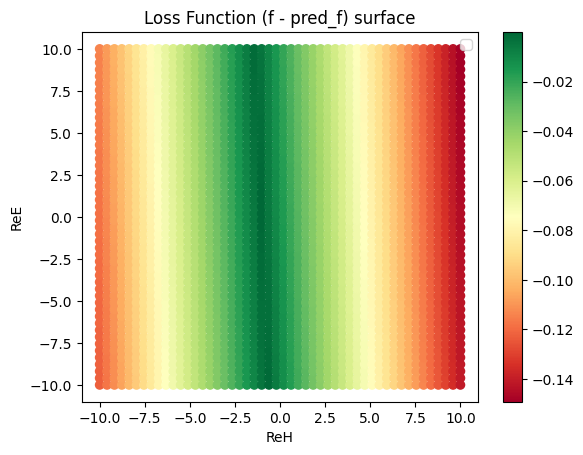

In [12]:
cff_range = np.linspace(-10, 10, 50)
grid = np.meshgrid(cff_range, cff_range)

reh, ree = grid
reh = reh.flatten()
ree = ree.flatten()

f_values = []
bhdvcstf = BHDVCStf() 
for i in range(len(reh)):
    params = tf.cast([[reh[i], ree[i], -0.396272489, 0.01776132]], dtype=tf.float32) # h, e, ht, dvcs
    input_tensor = tf.cast([[1.820000052, 0.342999995, -0.172000006, 7.5, 5.75]], dtype=tf.float32) 	

    f_value = bhdvcstf.curve_fit(input_tensor, params)
    f_values.append(-1 * abs(0.120053172 - f_value))

# Create a scatter plot
sc = plt.scatter(reh, ree, c=f_values, cmap = 'RdYlGn')
plt.colorbar(sc)
plt.title('Loss Function (f - pred_f) surface')
plt.xlabel('ReH')
plt.ylabel('ReE')
plt.legend()
plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


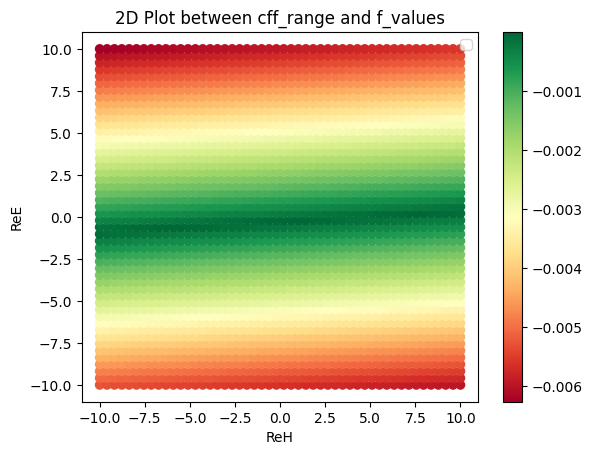

In [16]:
cff_range = np.linspace(-10, 10, 50)
grid = np.meshgrid(cff_range, cff_range)

reh, ree = grid
reh = reh.flatten()
ree = ree.flatten()

f_valuess = []
bhdvcstf = BHDVCStf() 
for i in range(len(reh)):
    params = tf.cast([[reh[i], ree[i], -0.396272489, 0.01776132]], dtype=tf.float32) # h, e, ht, dvcs
    input_tensor = tf.cast([[1.820000052, 0.342999995, -0.172000006, 202.5, 5.75]], dtype=tf.float32) 	

    f_value = bhdvcstf.curve_fit(input_tensor, params)
    f_valuess.append(abs(0.04728751629591 - f_value))

# Create a scatter plot
sc = plt.scatter(reh, ree, c=-1*np.array(f_valuess), cmap = 'RdYlGn')
plt.colorbar(sc)
plt.title('2D Plot between cff_range and f_values')
plt.xlabel('ReH')
plt.ylabel('ReE')
plt.legend()
plt.show()  

In [9]:
min_indices = np.argsort(np.array(f_valuess).flatten())[:10]

In [10]:
coordinates = []
for i in min_indices: 
    coordinates.append((reh[i], ree[i]))

In [11]:
coordinates

[(7.551020408163264, 0.204081632653061),
 (-5.918367346938775, -0.612244897959183),
 (0.612244897959183, -0.204081632653061),
 (1.0204081632653068, -0.204081632653061),
 (-6.326530612244898, -0.612244897959183),
 (7.95918367346939, 0.204081632653061),
 (7.142857142857142, 0.204081632653061),
 (-5.5102040816326525, -0.612244897959183),
 (0.204081632653061, -0.204081632653061),
 (1.4285714285714288, -0.204081632653061)]

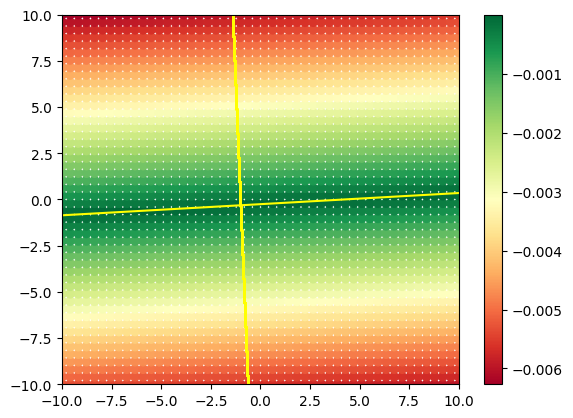

In [273]:
min_indices = np.argsort(np.log(np.array(f_valuess)*-1).flatten())[:10]
coordinates = []
for i in min_indices: 
    coordinates.append((reh[i], ree[i]))

x, y = zip(*coordinates)
m, b = np.polyfit(x, y, 1)

line_y = m * reh + b
plt.plot(reh, line_y, color='yellow')
sc = plt.scatter(reh, ree, c=f_valuess, cmap = 'RdYlGn')

min_indices = np.argsort(np.log(np.array(f_values)*-1).flatten())[:10]
coordinates = []
for i in min_indices: 
    coordinates.append((reh[i], ree[i]))

x, y = zip(*coordinates)
m1, b1 = np.polyfit(x, y, 1)

line_y = m1 * reh + b1
plt.plot(reh, line_y, color='yellow')

plt.colorbar(sc)

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

In [274]:
def find_intersection(*equations):
    # Create a matrix A and a vector B from the equations
    A = np.array([eq[:-1] for eq in equations])
    B = -np.array([eq[-1] for eq in equations])

    # Solve the system of linear equations
    intersection_point = np.linalg.solve(A, B)

    return tuple(intersection_point)

In [275]:
find_intersection([-m, 1, -b], [-m1, 1, -b1]) # y = mx + b -> -mx + y - b = 0

(-0.9848354817116072, -0.3126448224369643)

In [166]:
cff_range = np.linspace(-1.2, 0.2, 35)
grid = np.meshgrid(cff_range, cff_range, cff_range)

reh, ree, reht = grid
reh = reh.flatten()
ree = ree.flatten()
reht = reht.flatten()

f_angle1 = []
f_angle2 = []
f_angle3 = []
bhdvcstf = BHDVCStf() 
for i in range(len(reh)):
    params = tf.cast([[reh[i], ree[i], reht[i], 0.01776132]], dtype=tf.float32) # h, e, ht, dvcs
    f_value = bhdvcstf.curve_fit(tf.cast([[1.820000052, 0.342999995, -0.172000006, 127.5, 5.75]], dtype=tf.float32) , params)
    f_angle1.append(-1 * abs(0.053479675203562 - f_value))

    f_value = bhdvcstf.curve_fit(tf.cast([[1.820000052, 0.342999995, -0.172000006, 7.5, 5.75]], dtype=tf.float32) , params)
    f_angle2.append(-1 * abs(0.120053172111511 - f_value))

    f_value = bhdvcstf.curve_fit(tf.cast([[1.820000052, 0.342999995, -0.172000006, 247.5, 5.75]], dtype=tf.float32) , params)
    f_angle3.append(-1 * abs(0.058736920356751 - f_value))


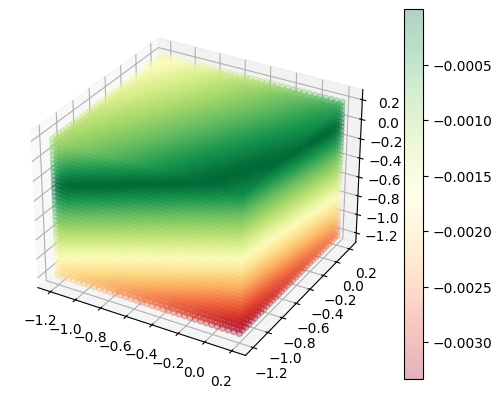

In [167]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reh, ree, reht, c=f_angle1, cmap='RdYlGn', alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter)

In [177]:
min_indices = np.argsort(np.log(np.array(f_angle1)*-1).flatten())[:20]
coordinates = []
for i in min_indices: 
    coordinates.append((reh[i], ree[i], reht[i]))

x, y, z = zip(*coordinates)

design_matrix = np.column_stack((x, y, np.ones_like(x)))

# Use numpy's lstsq to find the coefficients of the plane equation
coefficients, _, _, _ = np.linalg.lstsq(design_matrix, z, rcond=None)
a, b, c = coefficients

xx, yy = np.meshgrid(x, y)
zz = a * xx + b * yy + c # z = ax + bx + c -> -ax - by + z - c = 0
eqn1 = [a, b, -1, c]

(-1.3, 0.3)

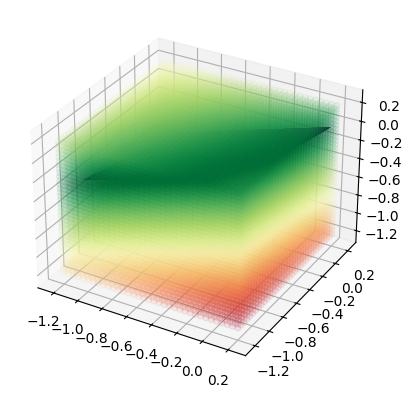

In [165]:
# Plot the 3D points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reh, ree, reht, c=f_angle1, cmap='RdYlGn', alpha=0.075)

# Plot the plane
ax.plot_surface(xx, yy, zz, color='purple', label='Plane of Best Fit')

ax.set_xlim(-1.3, 0.3)
ax.set_ylim(-1.3, 0.3)
ax.set_zlim(-1.3, 0.3)

In [178]:
min_indices = np.argsort(np.log(np.array(f_angle2)*-1).flatten())[:20]
coordinates = []
for i in min_indices: 
    coordinates.append((reh[i], ree[i], reht[i]))

x, y, z = zip(*coordinates)

design_matrix = np.column_stack((x, y, np.ones_like(x)))

# Use numpy's lstsq to find the coefficients of the plane equation
coefficients, _, _, _ = np.linalg.lstsq(design_matrix, z, rcond=None)
a, b, c = coefficients

xx, yy = np.meshgrid(x, y)
zz = a * xx + b * yy + c
eqn2 = [a, b, -1, c]

In [179]:
min_indices = np.argsort(np.log(np.array(f_angle3)*-1).flatten())[:20]
coordinates = []
for i in min_indices: 
    coordinates.append((reh[i], ree[i], reht[i]))

x, y, z = zip(*coordinates)

design_matrix = np.column_stack((x, y, np.ones_like(x)))

# Use numpy's lstsq to find the coefficients of the plane equation
coefficients, _, _, _ = np.linalg.lstsq(design_matrix, z, rcond=None)
a, b, c = coefficients

xx, yy = np.meshgrid(x, y)
zz = a * xx + b * yy + c
eqn3 = [a, b, -1, c]

In [180]:
find_intersection(eqn1, eqn2, eqn3)

(-0.992289889155353, -0.30513935880403054, -0.39732445236551883)

In [223]:
cff_range = np.linspace(-2, 1, 30)
dvcs_range = np.linspace(-0.5, 0.5, 20) 
grid = np.meshgrid(cff_range, cff_range, cff_range, dvcs_range)

reh, ree, reht, dvcs = grid
reh = reh.flatten()
ree = ree.flatten()
reht = reht.flatten()
dvcs = dvcs.flatten() 

f_angle1 = []
f_angle2 = []
f_angle3 = []
f_angle4 = []

bhdvcstf = BHDVCStf() 
for i in range(len(reh)):
    params = tf.cast([[reh[i], ree[i], reht[i], dvcs[i]]], dtype=tf.float32) # h, e, ht, dvcs
    f_value = bhdvcstf.curve_fit(tf.cast([[1.820000052, 0.342999995, -0.172000006, 7.5, 5.75]], dtype=tf.float32) , params)
    f_angle1.append(-1 * abs(0.120053172111511 - f_value))

    f_value = bhdvcstf.curve_fit(tf.cast([[1.820000052, 0.342999995, -0.172000006, 97.5, 5.75]], dtype=tf.float32) , params)
    f_angle2.append(-1 * abs(0.065618008375168 - f_value))

    f_value = bhdvcstf.curve_fit(tf.cast([[1.820000052, 0.342999995, -0.172000006, 187.5, 5.75]], dtype=tf.float32) , params)
    f_angle3.append(-1 * abs(0.046104423701763 - f_value))

    f_value = bhdvcstf.curve_fit(tf.cast([[1.820000052, 0.342999995, -0.172000006, 277.5, 5.75]], dtype=tf.float32) , params)
    f_angle4.append(-1 * abs(0.074176475405693 - f_value))

In [224]:
data = {'7.5': f_angle1, '97.5': f_angle2, '187.5': f_angle3, '277.5': f_angle4}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('output.csv', index=False)

In [4]:
f = [(0.02, (0 , 0)), (0.01, (1 , 3)),  (0.07, (-1 , 0)),  (0.9, (2 , 3))]
min_indices = np.argsort([x[0] for x in f])[:2]
coordinates = [f[i][1] for i in min_indices]
print(coordinates)

[(1, 3), (0, 0)]


In [262]:
def return_eqn(f, prev_values):
    min_indices = np.argsort(np.log(np.array(f)*-1).flatten())[:50]
    coordinates = []
    for i in min_indices: 
        coordinates.append((reh[i], ree[i], reht[i], dvcs[i]))

    x, y, z, d = zip(*coordinates)

    design_matrix = np.column_stack((x, y, z, np.ones_like(x)))

    # Use numpy's lstsq to find the coefficients of the plane equation
    coefficients, _, _, _ = np.linalg.lstsq(design_matrix, d, rcond=None)
    a, b, c, e = coefficients

    return [a, b, c, -1, e]

eqn1 = return_eqn(f_angle1)
# eqn2 = return_eqn(f_angle2)
# eqn3 = return_eqn(f_angle3)
# eqn4 = return_eqn(f_angle4)

find_intersection(eqn1, eqn2, eqn3, eqn4)

tf.Tensor([[-0.00212726]], shape=(1, 1), dtype=float32)
tf.Tensor([[-0.01787274]], shape=(1, 1), dtype=float32)
tf.Tensor([[-0.01665272]], shape=(1, 1), dtype=float32)
tf.Tensor([[-0.00334728]], shape=(1, 1), dtype=float32)
tf.Tensor([[-0.00349277]], shape=(1, 1), dtype=float32)


(598405472671027.0, 4875559811866969.0, 850653049607475.9, 0.0)

In [260]:
cff_range = np.linspace(-1.5, 0, 10)
dvcs_range = np.linspace(0, 0.5, 10) 
grid = np.meshgrid(cff_range, cff_range, cff_range, dvcs_range)

reh, ree, reht, dvcs = grid
reh = reh.flatten()
ree = ree.flatten()
reht = reht.flatten()
dvcs = dvcs.flatten() 

f_angle1 = []
f_angle2 = []
f_angle3 = []
f_angle4 = []

bhdvcstf = BHDVCStf() 
for i in range(len(reh)):
    params = tf.cast([[reh[i], ree[i], reht[i], dvcs[i]]], dtype=tf.float32) # h, e, ht, dvcs
    f_value = bhdvcstf.curve_fit(tf.cast([[1.820000052, 0.342999995, -0.172000006, 7.5, 5.75]], dtype=tf.float32) , params)
    f_angle1.append(-1 * abs(0.120053172111511 - f_value))

    # f_value = bhdvcstf.curve_fit(tf.cast([[1.820000052, 0.342999995, -0.172000006, 97.5, 5.75]], dtype=tf.float32) , params)
    # f_angle2.append(-1 * abs(0.065618008375168 - f_value))

    # f_value = bhdvcstf.curve_fit(tf.cast([[1.820000052, 0.342999995, -0.172000006, 187.5, 5.75]], dtype=tf.float32) , params)
    # f_angle3.append(-1 * abs(0.046104423701763 - f_value))

    # f_value = bhdvcstf.curve_fit(tf.cast([[1.820000052, 0.342999995, -0.172000006, 277.5, 5.75]], dtype=tf.float32) , params)
    # f_angle4.append(-1 * abs(0.074176475405693 - f_value))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


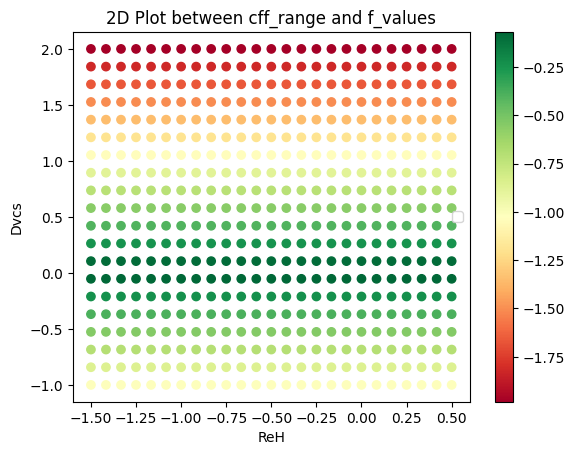

In [276]:
cff_range = np.linspace(-1.5, 0.5, 25)
dvcs = np.linspace(-1, 2, 20)
grid = np.meshgrid(cff_range, dvcs)

reh, ree = grid
reh = reh.flatten()
ree = ree.flatten()

f_valuess = []
bhdvcstf = BHDVCStf() 
for i in range(len(reh)):
    params = tf.cast([[reh[i], -0.31, -0.396272489, ree[i]]], dtype=tf.float32) # h, e, ht, dvcs
    input_tensor = tf.cast([[1.820000052, 0.342999995, -0.172000006, 202.5, 5.75]], dtype=tf.float32) 	

    f_value = bhdvcstf.curve_fit(input_tensor, params)
    f_valuess.append(-1 * abs(0.04728751629591 - f_value))

# Create a scatter plot
sc = plt.scatter(reh, ree, c=f_valuess, cmap = 'RdYlGn')
plt.colorbar(sc)
plt.title('2D Plot between cff_range and f_values')
plt.xlabel('ReH')
plt.ylabel('Dvcs')
plt.legend()
plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


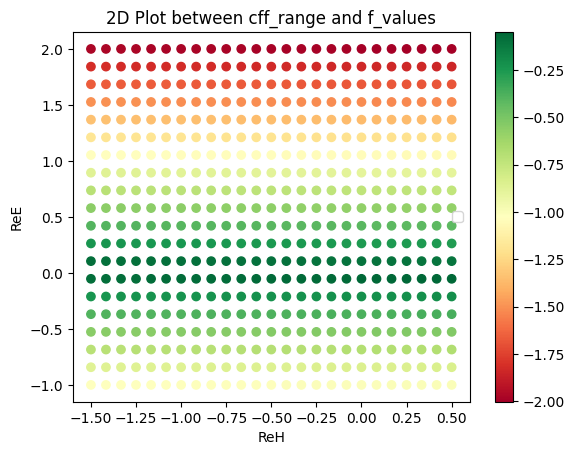

In [277]:
cff_range = np.linspace(-1.5, 0.5, 25)
dvcs = np.linspace(-1, 2, 20)
grid = np.meshgrid(cff_range, dvcs)

reh, ree = grid
reh = reh.flatten()
ree = ree.flatten()

f_values = []
bhdvcstf = BHDVCStf() 
for i in range(len(reh)):
    params = tf.cast([[reh[i], -0.396272489, -0.396272489, ree[i]]], dtype=tf.float32) # h, e, ht, dvcs
    input_tensor = tf.cast([[1.820000052, 0.342999995, -0.172000006, 7.5, 5.75]], dtype=tf.float32) 	

    f_value = bhdvcstf.curve_fit(input_tensor, params)
    f_values.append(-1 * abs(0.120053172 - f_value))

# Create a scatter plot
sc = plt.scatter(reh, ree, c=f_values, cmap = 'RdYlGn')
plt.colorbar(sc)
plt.title('2D Plot between cff_range and f_values')
plt.xlabel('ReH')
plt.ylabel('ReE')
plt.legend()
plt.show()  

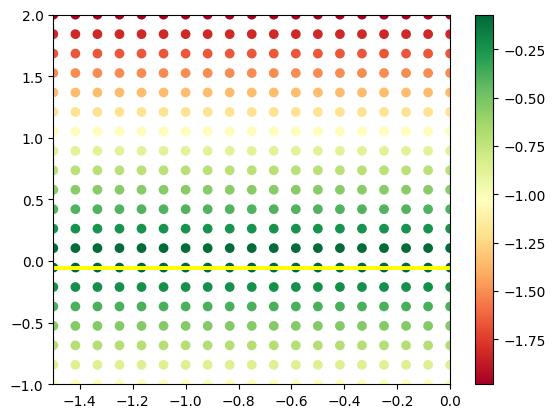

In [279]:
min_indices = np.argsort(np.log(np.array(f_valuess)*-1).flatten())[:10]
coordinates = []
for i in min_indices: 
    coordinates.append((reh[i], ree[i]))

x, y = zip(*coordinates)
m, b = np.polyfit(x, y, 1)

line_y = m * reh + b
plt.plot(reh, line_y, color='yellow')
sc = plt.scatter(reh, ree, c=f_valuess, cmap = 'RdYlGn')

min_indices = np.argsort(np.log(np.array(f_values)*-1).flatten())[:10]
coordinates = []
for i in min_indices: 
    coordinates.append((reh[i], ree[i]))

x, y = zip(*coordinates)
m1, b1 = np.polyfit(x, y, 1)

line_y = m1 * reh + b1
plt.plot(reh, line_y, color='yellow')

plt.colorbar(sc)

plt.xlim(- 1.5, 0)
plt.ylim(-1, 2)
plt.show()

In [5]:
data_file = 'PseudoData_from_the_Basic_Model_for_JLab_Kinematics.csv'
df = pd.read_csv(data_file, dtype=np.float64)